In [1]:
import os
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import cv2
from src.utils import resize
# from PIL import Image
from src.get_image_features import ImgFeaturesExtractor
from src.segmenting import segment_utils
import os

from src.yolo.detecting_objects_yolo import detect_objects_yolo, draw_bounding_box


from src.detect_color_consistency import calculate_color_metrics
import warnings

warnings.filterwarnings('ignore')
from src.segmenting import segment_utils


img_features_extractor = ImgFeaturesExtractor(include_top=False, normalize=True, black_and_white=False)



def preprocess_img(img_file):
    img = cv2.imread(img_file)
    image_info = {'org_img': img, 'img_file': img_file}
    img = resize(img)
    image_info.update({"img": img})
    image_info = segment_utils(image_info)
    return image_info

...load U2NET---173.6 MB


# Image similarity

**************************************************


<Figure size 1080x936 with 0 Axes>

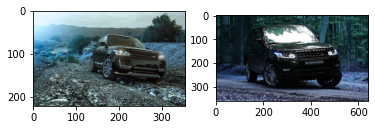

**************************************************
0.23775439
**************************************************


<Figure size 1080x936 with 0 Axes>

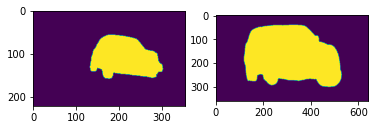

**************************************************


<Figure size 1080x936 with 0 Axes>

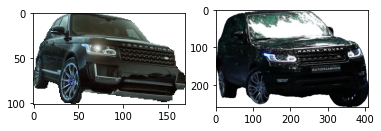

**************************************************
0.63078505


In [2]:

i = os.path.join("data", "car_nature4.jpg")
j = os.path.join( "data", "car_nature5.jpg")
image_info_i = preprocess_img(i)
image_info_j = preprocess_img(j)



plt.figure(figsize=(15,13))
f, axarr = plt.subplots(1,2) 
print(50*'*')
axarr[0].imshow(image_info_i['img'])
axarr[1].imshow(image_info_j['img'])
plt.show()

x1 = img_features_extractor.extract(image_info_i['img'])
x2 = img_features_extractor.extract(image_info_j['img'])
sim = cosine_similarity(x1, x2)[0][0]
print(50*'*')
print(sim)

plt.figure(figsize=(15,13))
f, axarr = plt.subplots(1,2) 
print(50*'*')
axarr[0].imshow(image_info_i['segment_utils_results']['segmented'])
axarr[1].imshow(image_info_j['segment_utils_results']['segmented'])
plt.show()


plt.figure(figsize=(15,13))
f, axarr = plt.subplots(1,2) 
print(50*'*')
axarr[0].imshow(image_info_i['segment_utils_results']['contor_imgs'][0])
axarr[1].imshow(image_info_j['segment_utils_results']['contor_imgs'][0])
plt.show()


x1 = img_features_extractor.extract(image_info_i['segment_utils_results']['contor_imgs'][0])
x2 = img_features_extractor.extract(image_info_j['segment_utils_results']['contor_imgs'][0])
sim = cosine_similarity(x1, x2)[0][0]
print(50*'*')
print(sim)

# Objects colour comparison


In [3]:
image_info_i.update(calculate_color_metrics(image_info_i))
image_info_j.update(calculate_color_metrics(image_info_j))
image_info_i['fore_avg']-image_info_j['fore_avg']

array([[-1.01233429],
       [-0.80076884],
       [-5.17058314]])

# Object detection


**************************************************


<Figure size 1080x936 with 0 Axes>

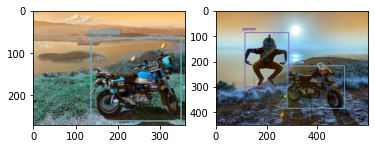

**************************************************


<Figure size 1080x936 with 0 Axes>

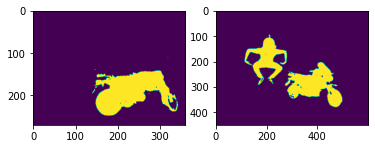

**************************************************


<Figure size 1080x936 with 0 Axes>

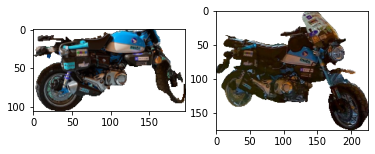

In [4]:

i = os.path.join("data", "moto1.jpg")
j = os.path.join( "data", "moto2.jpg")
image_info_i = preprocess_img(i)
image_info_j = preprocess_img(j)
image_info_i.update(detect_objects_yolo(image_info_i['img']))
image_info_j.update(detect_objects_yolo(image_info_j['img']))


plt.figure(figsize=(15,13))
f, axarr = plt.subplots(1,2) 
print(50*'*')
axarr[0].imshow(image_info_i['img'])
axarr[1].imshow(image_info_j['img'])
plt.show()


plt.figure(figsize=(15,13))
f, axarr = plt.subplots(1,2) 
print(50*'*')
axarr[0].imshow(image_info_i['segment_utils_results']['segmented'])
axarr[1].imshow(image_info_j['segment_utils_results']['segmented'])
plt.show()


plt.figure(figsize=(15,13))
f, axarr = plt.subplots(1,2) 
print(50*'*')
axarr[0].imshow(image_info_i['segment_utils_results']['contor_imgs'][0])
axarr[1].imshow(image_info_j['segment_utils_results']['contor_imgs'][0])
plt.show()

